In [1]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones

# librerías de para implementar modelo Kmeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Librería para evitar la advertencia de que el modelo de KMeans tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('./Mall_Customers.csv')

In [5]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(200)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
# Descripción de los datos
Datos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

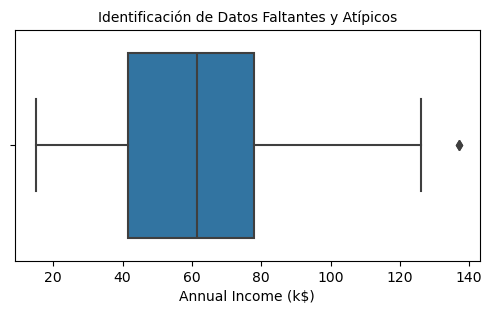

In [7]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Annual Income (k$)'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [9]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en Edad: ",Datos['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Salario: ",Datos['Annual Income (k$)'].isin([0]).sum())
print("Cantidad de Registros con cero en Score: ",Datos['Spending Score (1-100)'].isin([0]).sum())

Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Salario:  0
Cantidad de Registros con cero en Score:  0


In [10]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

Datos['Annual Income (k$)']=Datos['Annual Income (k$)'].replace(0,Datos['Annual Income (k$)'].mean())

Text(0.5, 1.0, 'Identificación de Datos Atípicos')

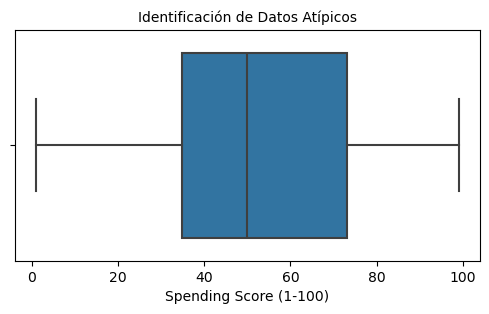

In [11]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Spending Score (1-100)'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [13]:
#Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((Datos['Spending Score (1-100)']<nivel_minimo)|(Datos['Spending Score (1-100)']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [14]:
# Filtra Datos Atípicos

Datos=Datos[(Datos['Spending Score (1-100)']<nivel_maximo)&(Datos['Spending Score (1-100)']>nivel_minimo)]

In [15]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [16]:
# Filtrar columnas del modelo 

Datos = Datos[["Age","Annual Income (k$)","Spending Score (1-100)"]]

In [17]:
# Revisión de los datos de las variables objetivo

Datos.head(10)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


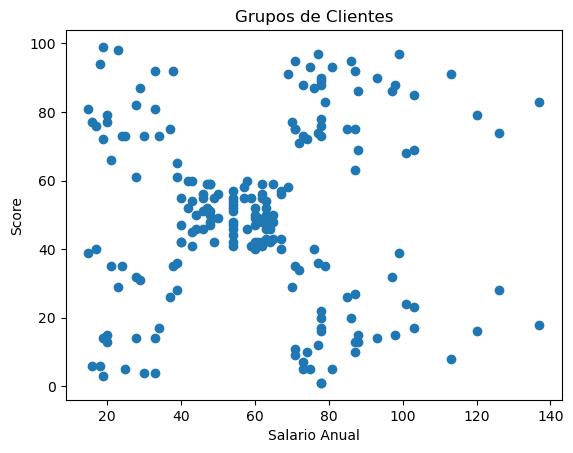

In [18]:
# Grafica antes del agrupamiento

plt.scatter(Datos['Annual Income (k$)'], Datos['Spending Score (1-100)'])
plt.xlabel('Salario Anual')
plt.ylabel('Score')
plt.title('Grupos de Clientes')
plt.show()

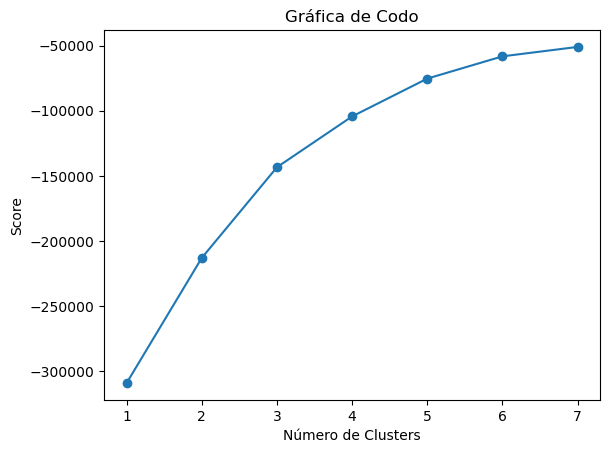

In [19]:
#Se realiza gráfica de codo para identificar valor de K

Nc = range(1, 8)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(Datos).score(Datos) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de Codo')
plt.show()

In [20]:
# Generación del modelo de Agrupamiento del modelo con K=5 (Es decir haremos 5 grupos de agrupamiento) 

Modelo = KMeans(n_clusters=5, random_state=0)
Modelo.fit(Datos)
 

KMeans(n_clusters=5, random_state=0)

In [21]:
#Se agrega la columna Grupo a la BD para identificar el numero de grupo del agrupamiento

Modelo.labels_
Datos["Grupo"] = Modelo.labels_ 
print (Datos)

     Age  Annual Income (k$)  Spending Score (1-100)  Grupo
0     19                  15                      39      0
1     21                  15                      81      4
2     20                  16                       6      0
3     23                  16                      77      4
4     31                  17                      40      0
..   ...                 ...                     ...    ...
195   35                 120                      79      1
196   45                 126                      28      3
197   32                 126                      74      1
198   32                 137                      18      3
199   30                 137                      83      1

[200 rows x 4 columns]


In [22]:
# Desempeño del modelo con el Coeficiente de Silhouette el Índice de Calinski-Harabasz y el índice de Davies Bouldin Score

# Preparación de la metrica de la columna Grupo
Observaciones = len(Datos)
X = Datos.drop('Grupo', axis=1)
clusters = Datos['Grupo']

# Se calculan las métricas
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Se crea una tabla para mostrar los valores de las métricas
table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]

# Imprime la tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+--------------------------+---------------------+
|          Metric          |        Value        |
+--------------------------+---------------------+
| Numero de Observaciones  |         200         |
|  Coeficiente Silhouette  | 0.44428597560893024 |
| Indice Calinski Harabasz | 151.04386000160667  |
|  Indice Davies Bouldin   | 0.8218781633199781  |
+--------------------------+---------------------+


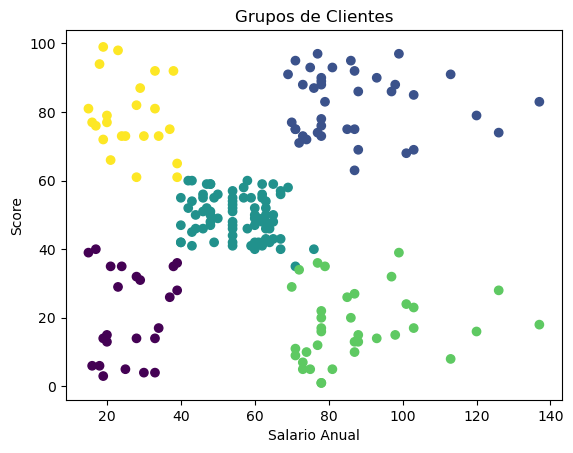

In [23]:
plt.scatter(Datos['Annual Income (k$)'], Datos['Spending Score (1-100)'], c=Datos['Grupo'], cmap='viridis')
plt.xlabel('Salario Anual')
plt.ylabel('Score')
plt.title('Grupos de Clientes')
plt.show()